## Overview  
This is a Simple Linear Regression Model fit to the 1970's Boston Housing Dataset  
The below code is a combination of tutorials from 'towards data science' and an Udemy Machine Learning class  

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/?utm_source=adwords&utm_medium=udemyads&utm_campaign=Python_v.PROF_la.EN_cc.US_ti.7380&utm_content=deal4584&utm_term=_._ag_78513466559_._ad_436603254913_._kw__._de_c_._dm__._pl__._ti_dsa-774930046209_._li_9030072_._pd__._&matchtype=b&gclid=Cj0KCQiA9P__BRC0ARIsAEZ6iriN81oGE4RLs6f0zCpoBHxAbJNchYTEvzNHU9QE-cNlYdKRtxqLnAAaAkiaEALw_wcB


## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Oberservations & Feature Selection](#obs_feature_select)
* [Splitting the data into training and testing sets](#split_data)
* [Create and Train the Model](#train_model)
* [Model Evaluation](#model_eval)
* [Predictions from our Model](#predict)
* [Evaluation Metrics](#eval_metrics)

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

In [18]:
#retrieve built-in scikit-learn Boston Housing Dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [29]:
#view keys and explore/understand data
print(boston.keys())

#data = feature dataset
#target = target values
#feature_names = column names
#DESCR = describes dataset 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [104]:
#view description of dataset
#print(boston.DESCR)

<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

In [30]:
#assign data to dataframe
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [40]:
#verify desired columns are present; the 'target' values are missing so append target values as new column to dataset
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [39]:
#append target values as new column to dataset
df['MEDV']=boston.target

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [43]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [44]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [49]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

Understanding the relationship between the feature attributes and the target variable

In [51]:
#sns.pairplot(df)

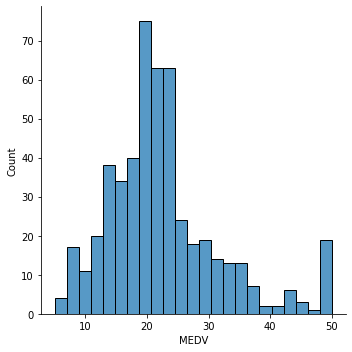

In [52]:
sns.displot(df['MEDV'])

In [66]:
#create a correlation matrix, round to 2 decimal places
correlation_matrix = df.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<AxesSubplot:>

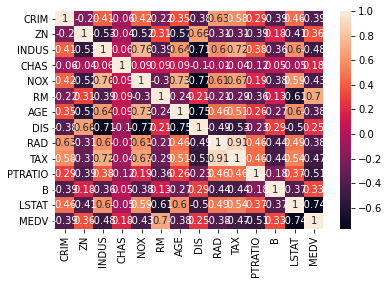

In [62]:
#plot the correlation matrix as a heat map
sns.heatmap(data=correlation_matrix,annot=True)

#sns.heatmap(data=df.corr().round(2),annot=True)


<a class="anchor" id="obs_feature_select"></a>
## Oberservations & Feature Selection

To fit a linear regression model, we select those features which have a high correlation with our target variable; and avoid features that have a high correlation with each other (multicollinearity)

[Keep] High correlation with target variable (MEDV):
    LSTAT: -0.74
    RM: 0.7

[Avoid] High correlation with each other:
    RAD & TAX (0.91)
    DIS & AGE (-0.75)
    


Text(0, 0.5, 'MEDV')

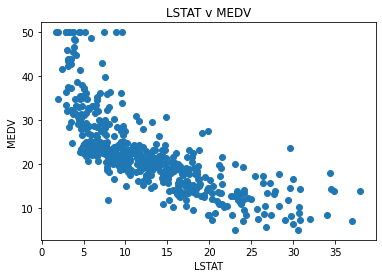

In [70]:
plt.scatter(x=df['LSTAT'],y=df['MEDV'])

plt.title('LSTAT v MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

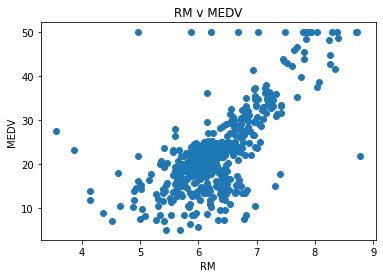

In [71]:
plt.scatter(x=df['RM'],y=df['MEDV'])

plt.title('RM v MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

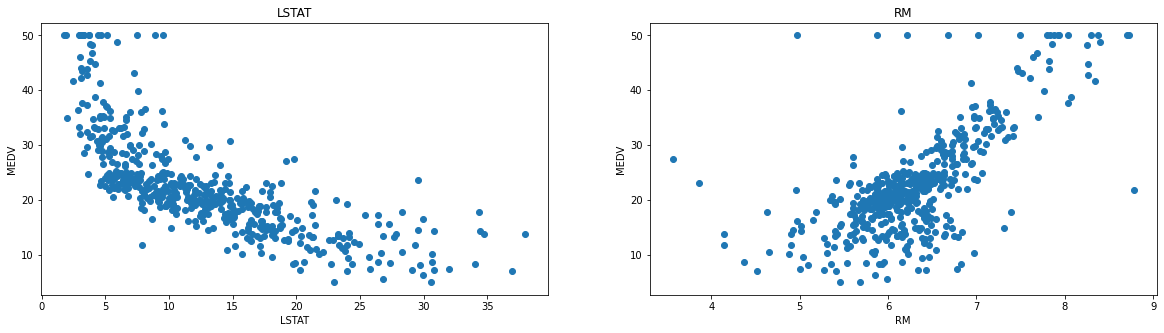

In [77]:
# plt.figure(figsize=(20, 5))

# features = ['LSTAT', 'RM']
# target = df['MEDV']

# for i, col in enumerate(features):
#     plt.subplot(1, len(features) , i+1)
#     x = df[col]
#     y = target
#     plt.scatter(x, y, marker='o')
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('MEDV')


<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

Create feature and label datasets;

For the feature dataset, create a new dataset with only the feature attributes you want; using pandas or numpy 'concatenate'

In [87]:
#Concatenate desired feature attribute columns together to create feature dataframe (X)
data = [df['LSTAT'],df['RM']]
columns = ['LSTAT','RM']


X = pd.concat(data,axis=1,keys=columns)

In [86]:
#X.head()

In [88]:
#Label dataframe (Y)

Y = df['MEDV']

Split data into train and test sets

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
#random_state = 5, to tie out to 'towards data science' tutorial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

<a class="anchor" id="train_model"></a>
## Create and Train the Model

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm = LinearRegression()

In [96]:
#fit to training data
lm.fit(X_train,y_train)

LinearRegression()

<a class="anchor" id="model_eval"></a>
## Model Evaluation

In [98]:
# print the intercept
print(lm.intercept_)

2.7362403426066244


In [99]:
#print the coefficients
lm.coef_

array([-0.71722954,  4.58938833])

In [100]:
#create a dataframe with the coefficient data, for easier readability
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

#  RM:       average number of rooms per dwelling
#  LSTAT:    % lower status of the population

,Coefficient
LSTAT,-0.717230
RM,4.589388


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **LSTAT** is associated with a **decrease of \.717 ($717) ** .  

- Holding all other features fixed, a 1 unit increase in **RM** is associated with an **increase of 4.59 ($4,590) ** .

<a class="anchor" id="predict"></a>
## Predictions from our Model

Fit the model to our Test data, then compare the predictions to the actual values

In [108]:
#pass in data the model hasn't seen before (feature data set of our test data)
predictions = lm.predict(X_test)

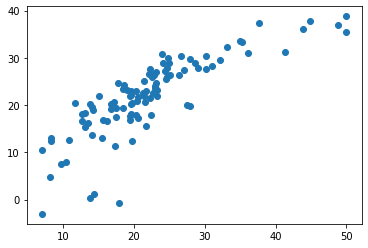

In [109]:
#compare predictions agains actual labels using a scatter plot, the more linear = the more accurate/correct predictions
plt.scatter(y_test,predictions)

**Residual Histogram**

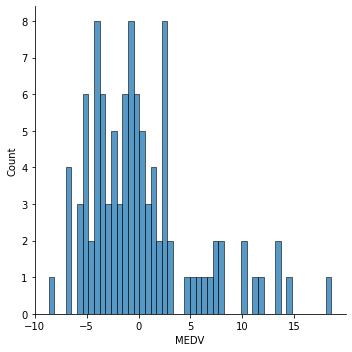

In [115]:
#create a histogram of the residuals (difference/error b/w actuals and predictions )

#if residuals are normally distributed (or approximate), then the model was the correct choice for the data; if not consider a different type of model
sns.displot((y_test-predictions),bins=50);

<a class="anchor" id="eval_metrics"></a>
## Evaluation Metrics

In [116]:
from sklearn import metrics

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.7913102133431047
MSE: 26.392886822666085
RMSE: 5.137400784702911
